In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas.tools import geocode
import geopy
from pyproj import CRS
import matplotlib.pyplot as plt
import descartes
import mapclassify
import pysal
import pygeos

# Read files
grid = gpd.read_file('MetropAccess_YKR_grid/MetropAccess_YKR_grid_EurefFIN.shp')

data = pd.read_csv('TravelTimes_to_5878070_Jumbo.txt', sep=';')

roads = gpd.read_file('roads/roads.shp')

#points of interest
suomenlinna = '00190 Helsinki, Finland'
rock_church = 'Lutherinkatu 3, Helsinki'

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/srv/conda/envs/notebook/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


<IPython.core.display.Javascript object>

In [3]:
# create dataframe of all addresses of interest
sites_of_interest = pd.DataFrame([suomenlinna, rock_church], 
                     columns = ['addr'])
sites_of_interest

,addr
0,"00190 Helsinki, Finland"
1,"Lutherinkatu 3, Helsinki"


<IPython.core.display.Javascript object>

In [4]:
# geocode addresses
sites_of_interest = geocode(sites_of_interest['addr'],provider='nominatim', user_agent='autogis_xx', timeout=4)
sites_of_interest

,geometry,address
0,POINT (24.98639 60.14525),"Suomenlinna, Eteläinen suurpiiri, Helsinki, He..."
1,POINT (24.92523 60.17296),"Temppeliaukion kirkko, 3, Lutherinkatu, Etu-Tö..."


<IPython.core.display.Javascript object>

In [5]:
# Rename 'from_id' column to 'YKR_ID'
data = data.rename(columns={'from_id':'YKR_ID'})

# Merge the travel times DataFrame to grid
data_geo = grid.merge(data, on='YKR_ID')

# GeoDataFrames reprojected to ETRS89 / TM35FIN based on crs of data_geo
roads = roads.to_crs(crs=data_geo.crs)

<IPython.core.display.Javascript object>

In [6]:
# Return only those values != -1 -- -1 will become NAN
data_geo = data_geo[data_geo != -1]
# Remove NAN
data_geo.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [7]:
# Aggregate data_geo by total_route_times 
travel_time = data_geo.dissolve(by='pt_m_t')
# reset index and drop index col -- drop first row containing invalid data
travel_time = travel_time.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [8]:
travel_time = data_geo[['pt_m_t','geometry']]

<IPython.core.display.Javascript object>

# Travel Times to Suomenlinna Sea Fortress & Temppeliaukio Church (Rock Church)

In [9]:
# Select Suomenlinna
suomenlinna = sites_of_interest.iloc[[0]]
# Ensure both mappings are of the same CRS
suomenlinna = suomenlinna.to_crs(crs=data_geo.crs)

<IPython.core.display.Javascript object>

In [10]:
# Select Suomenlinna
rock_church = sites_of_interest.iloc[[1]]
# Ensure both mappings are of the same CRS
rock_church = rock_church.to_crs(crs=data_geo.crs)

<IPython.core.display.Javascript object>

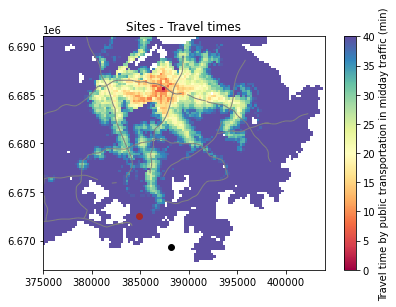

<IPython.core.display.Javascript object>

In [11]:
fig, ax = plt.subplots(figsize=(6,4))

# Plotting
travel_time.plot(ax=ax, column = "pt_m_t",
          linewidth=0.03, 
          cmap="Spectral",
          vmin=0, vmax=40,
          legend=True, 
          legend_kwds={'label': "Travel time by public transportation in midday traffic (min)"})

suomenlinna.plot(ax=ax, color='black', markersize=35)
rock_church.plot(ax=ax, color='brown', markersize=35)

roads.plot(ax=ax, color="grey", linewidth=1)

# Set title and legend to plot
ax.set_title('Sites - Travel times')

# Zoom
ax.set_xlim([375000, 404000])
ax.set_ylim([6667000, 6691000])

# Remove empty whitespace around the plots
plt.tight_layout()